In [ ]:
# Intalación de las dependencias necesarias
!apt-get -qq install xxd

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
!pip install everywhereml==0.2.21 ##0.2.21

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 7.2 MB/s eta 0:00:00
  Created wheel for everywhereml: filename=everywhereml-0.2.21-py3-none-any.whl size=78285 sha256=091b252d494d52bd935f207d0604fed80c7bea0d6639606770777c84b0c3d836
  Stored in directory: /root/.cache/pip/wheels/23/0b/8e/7fdf65a2e46c409346671bd8e4676b3dd92e17aaaa666667f3
  Created wheel for hexdump: filename=hexdump-3.3-py3-none-any.whl size=8894 sha256=aff4895d5a397f318df8890fdd7a2ba66b1ba0d02fb9dba52702e693a5dd2dc7
  Stored in directory: /root/.cache/pip/wheels/67/21/60/6c8dd0e145d13fd9501e1078cfd8aa34069f022cf4cdda6b0f
Successfully built everywhereml hexdump


In [ ]:
## Pandas permite el manejo de archivos como excel y csv
import pandas as pd

## Lista de archivos CSV sin encabezado
archivos = ["/content/formal.csv", "/content/hifive.csv", "/content/hola.csv"]

## Agregar nombres de columnas
columnas = ['aX', 'aY', 'aZ', 'gX', 'gY', 'gZ']

for archivo in archivos:
    df = pd.read_csv(archivo, header=None)
    df.columns = columnas
    df.to_csv(archivo, index=False)
    print(f"Encabezados agregados a {archivo}")


Encabezados agregados a /content/formal.csv
Encabezados agregados a /content/hifive.csv
Encabezados agregados a /content/hola.csv


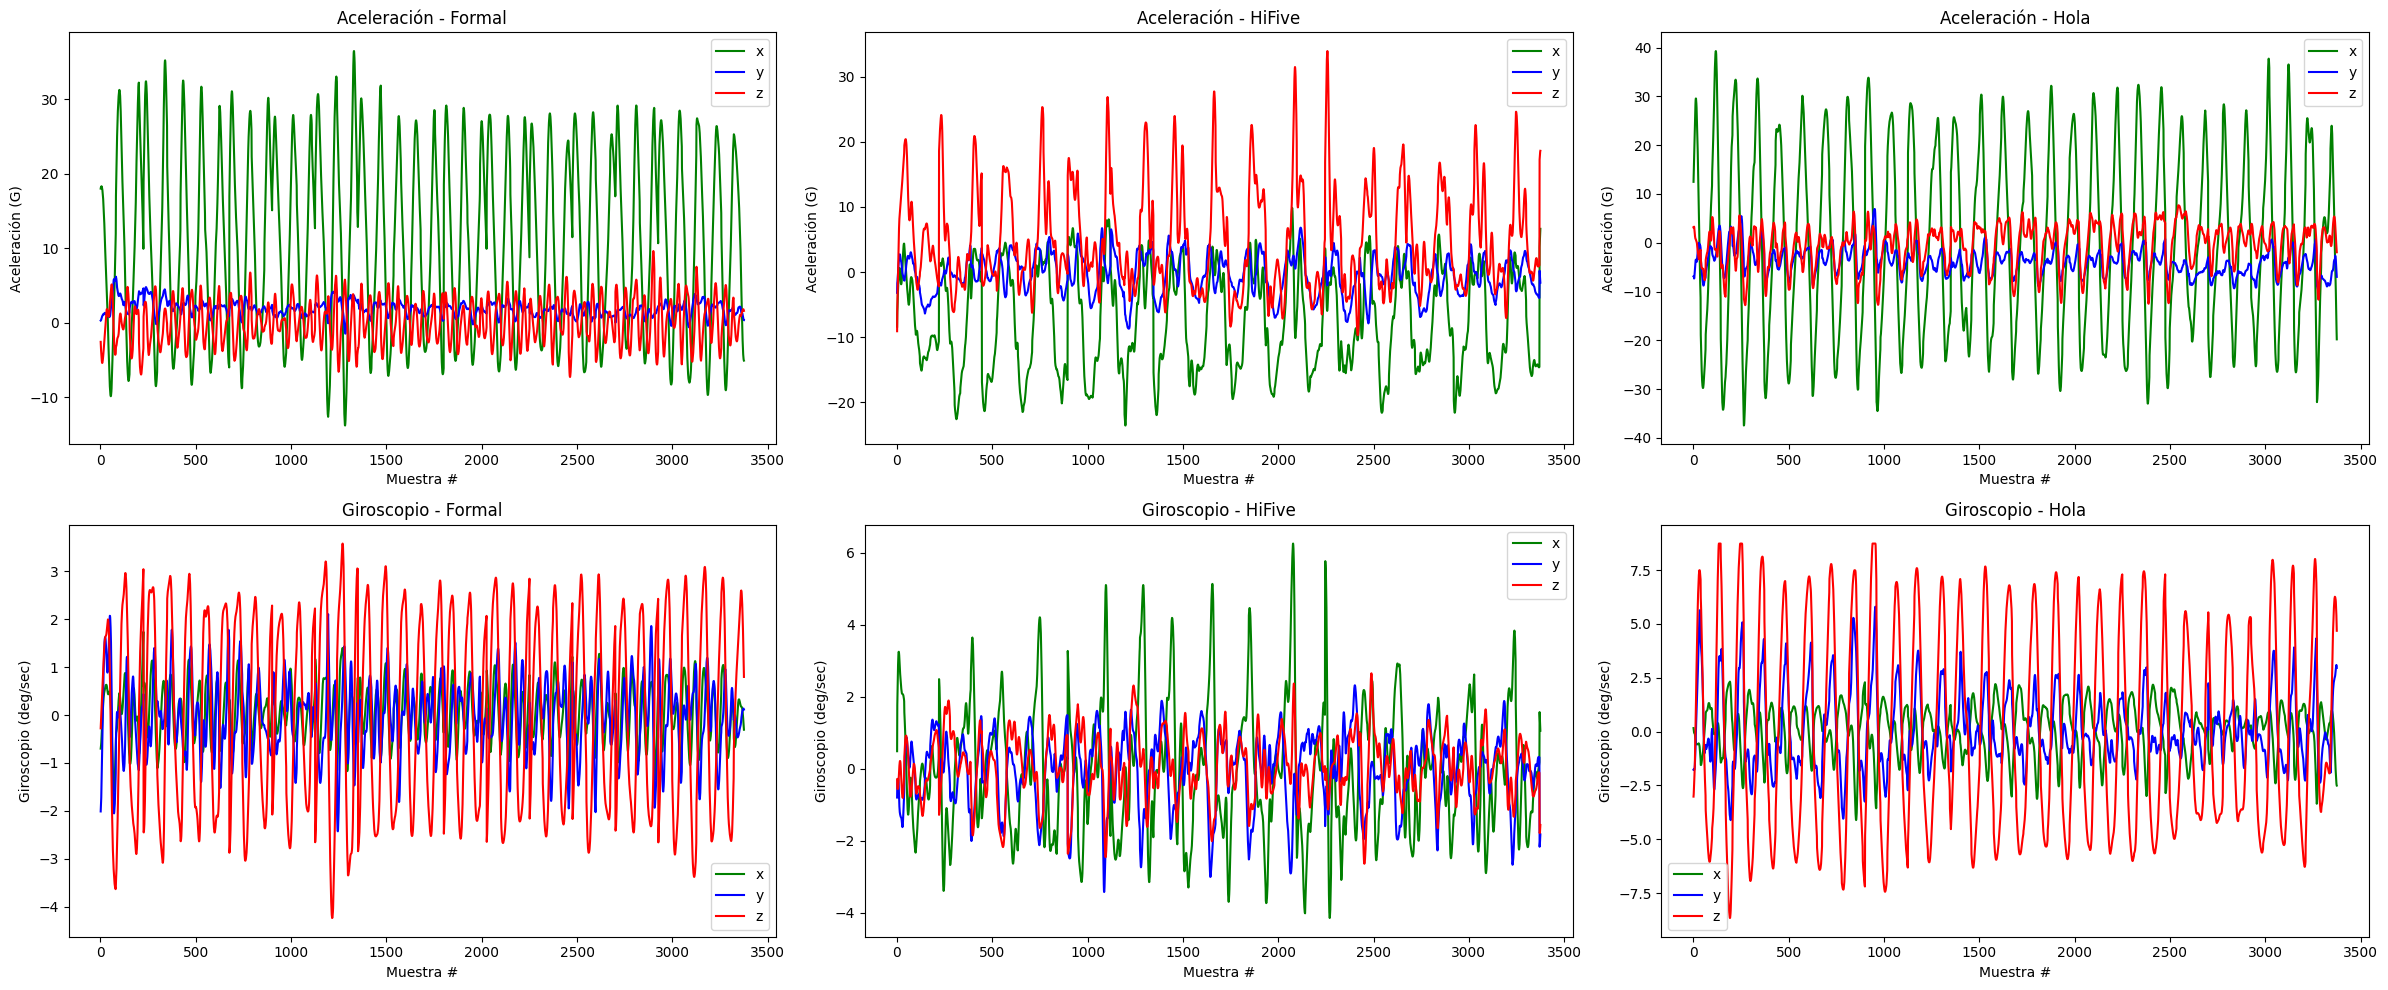

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df_formal = pd.read_csv("/content/formal.csv")
df_hifive = pd.read_csv("/content/hifive.csv")
df_hola = pd.read_csv("/content/hola.csv")

index_formal = range(1, len(df_formal['aX']) + 1)
index_hifive = range(1, len(df_hifive['aX']) + 1)
index_hola = range(1, len(df_hola['aX']) + 1)

## Crear figura con 2 filas y 3 columnas
fig, axs = plt.subplots(2, 3, figsize=(24, 10))

## FORMAL - Aceleración
axs[0, 0].plot(index_formal, df_formal['aX'], 'g-', label='x')
axs[0, 0].plot(index_formal, df_formal['aY'], 'b-', label='y')
axs[0, 0].plot(index_formal, df_formal['aZ'], 'r-', label='z')
axs[0, 0].set_title("Aceleración - Formal")
axs[0, 0].set_xlabel("Muestra #")
axs[0, 0].set_ylabel("Aceleración (G)")
axs[0, 0].legend()

## HIFIVE - Aceleración
axs[0, 1].plot(index_hifive, df_hifive['aX'], 'g-', label='x')
axs[0, 1].plot(index_hifive, df_hifive['aY'], 'b-', label='y')
axs[0, 1].plot(index_hifive, df_hifive['aZ'], 'r-', label='z')
axs[0, 1].set_title("Aceleración - HiFive")
axs[0, 1].set_xlabel("Muestra #")
axs[0, 1].set_ylabel("Aceleración (G)")
axs[0, 1].legend()

## HOLA - Aceleración
axs[0, 2].plot(index_hola, df_hola['aX'], 'g-', label='x')
axs[0, 2].plot(index_hola, df_hola['aY'], 'b-', label='y')
axs[0, 2].plot(index_hola, df_hola['aZ'], 'r-', label='z')
axs[0, 2].set_title("Aceleración - Hola")
axs[0, 2].set_xlabel("Muestra #")
axs[0, 2].set_ylabel("Aceleración (G)")
axs[0, 2].legend()

## FORMAL - Giroscopio
axs[1, 0].plot(index_formal, df_formal['gX'], 'g-', label='x')
axs[1, 0].plot(index_formal, df_formal['gY'], 'b-', label='y')
axs[1, 0].plot(index_formal, df_formal['gZ'], 'r-', label='z')
axs[1, 0].set_title("Giroscopio - Formal")
axs[1, 0].set_xlabel("Muestra #")
axs[1, 0].set_ylabel("Giroscopio (deg/sec)")
axs[1, 0].legend()

## HIFIVE - Giroscopio
axs[1, 1].plot(index_hifive, df_hifive['gX'], 'g-', label='x')
axs[1, 1].plot(index_hifive, df_hifive['gY'], 'b-', label='y')
axs[1, 1].plot(index_hifive, df_hifive['gZ'], 'r-', label='z')
axs[1, 1].set_title("Giroscopio - HiFive")
axs[1, 1].set_xlabel("Muestra #")
axs[1, 1].set_ylabel("Giroscopio (deg/sec)")
axs[1, 1].legend()

## HOLA - Giroscopio
axs[1, 2].plot(index_hola, df_hola['gX'], 'g-', label='x')
axs[1, 2].plot(index_hola, df_hola['gY'], 'b-', label='y')
axs[1, 2].plot(index_hola, df_hola['gZ'], 'r-', label='z')
axs[1, 2].set_title("Giroscopio - Hola")
axs[1, 2].set_xlabel("Muestra #")
axs[1, 2].set_ylabel("Giroscopio (deg/sec)")
axs[1, 2].legend()

## Mostrar los datos
plt.tight_layout()
plt.show()


In [ ]:
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# la lista de gestos para los que hay datos disponibles
GESTURES = [
    "formal",
    "hifive",
    "hola"
]

SAMPLES_PER_GESTURE = 225

NUM_GESTURES = len(GESTURES)

# crear una matriz codificada one-hot que se utiliza en la salida
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

inputs = []
outputs = []

# leer cada archivo csv y enviar una entrada y una salida
for gesture_index in range(NUM_GESTURES):
  gesture = GESTURES[gesture_index]
  print(f"Procesando índice {gesture_index} para gesto '{gesture}'.")

  output = ONE_HOT_ENCODED_GESTURES[gesture_index]

  df = pd.read_csv(f"/content/{gesture}.csv")

# calcular el número de grabaciones de gestos en el archivo
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)

  print(f"\tHay {num_recordings} grabaciones del gesto {gesture}.")

  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
      # normalizar los datos de entrada, entre 0 y 1:
      # - la aceleración está entre:   -30 30
      # - el giroscopio está entre:   -10 10
      tensor += [
          (df['aX'][index] + 30) / 60,
          (df['aY'][index] + 30) / 60,
          (df['aZ'][index] + 30) / 60,
          (df['gX'][index] + 10) / 20,
          (df['gY'][index] + 10) / 20,
          (df['gZ'][index] + 10) / 20
      ]

    inputs.append(tensor)
    outputs.append(output)

# convertir la lista en una matriz numpy
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Se completó el análisis y la preparación del conjunto de datos.")

Procesando índice 0 para gesto 'formal'.
	Hay 15 grabaciones del gesto formal.
Procesando índice 1 para gesto 'hifive'.
	Hay 15 grabaciones del gesto hifive.
Procesando índice 2 para gesto 'hola'.
	Hay 15 grabaciones del gesto hola.
Se completó el análisis y la preparación del conjunto de datos.


In [ ]:
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Intercambiar los índices consecutivos (0, 1, 2, etc.) con los índices aleatorios
inputs = inputs[randomize]
outputs = outputs[randomize]

# Divida las grabaciones (grupo de muestras) en tres conjuntos: entrenamiento, prueba y validación
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Se completó la aleatorización y división del conjunto de datos.")

Se completó la aleatorización y división del conjunto de datos.


In [ ]:
# Definición y entrenamiento del modelo
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(25, activation='relu'))
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

#optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # o 0.0001
history = model.fit(inputs_train, outputs_train, epochs=100, batch_size=2, validation_data=(inputs_validate, outputs_validate))


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2495 - mae: 0.4521 - val_loss: 0.2126 - val_mae: 0.4343
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2349 - mae: 0.4527 - val_loss: 0.1887 - val_mae: 0.4066
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2202 - mae: 0.4384 - val_loss: 0.1654 - val_mae: 0.3741
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2132 - mae: 0.4284 - val_loss: 0.1688 - val_mae: 0.3804
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2022 - mae: 0.4183 - val_loss: 0.1772 - val_mae: 0.3917
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2025 - mae: 0.4173 - val_loss: 0.1421 - val_mae: 0.3325
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1902 - mae: 0.4008 - val_loss: 0.1451 - val_mae: 0.3393
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1805 - mae: 0.3888 - val_loss: 0.1354 - val_mae: 0.3210
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │        67,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            48 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,528 (541.13 KB)

 Trainable params: 69,263 (270.56 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,265 (270.57 KB)

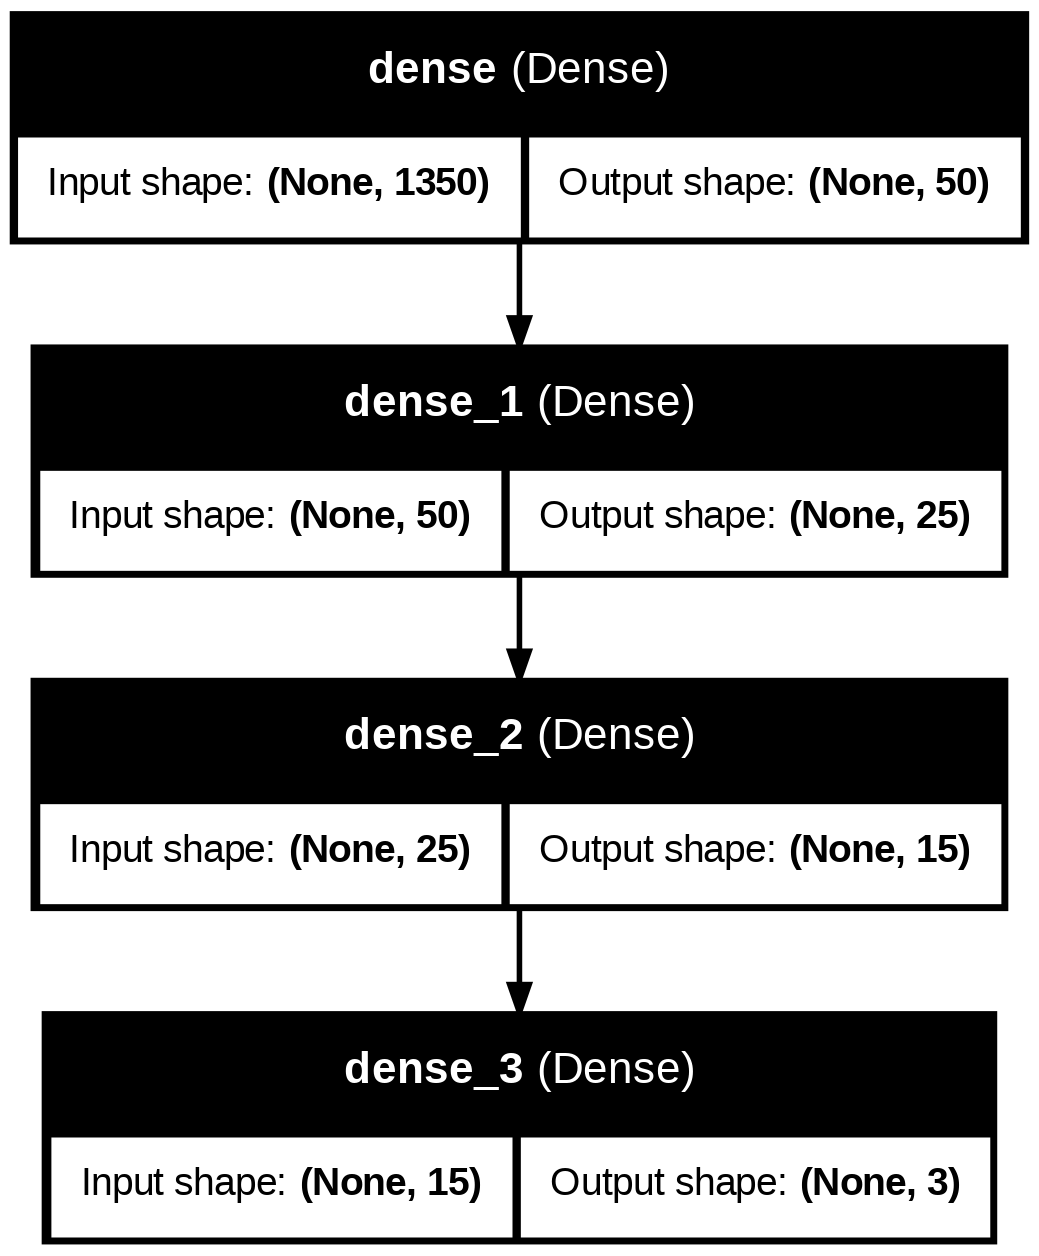

In [ ]:
model.summary()

tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

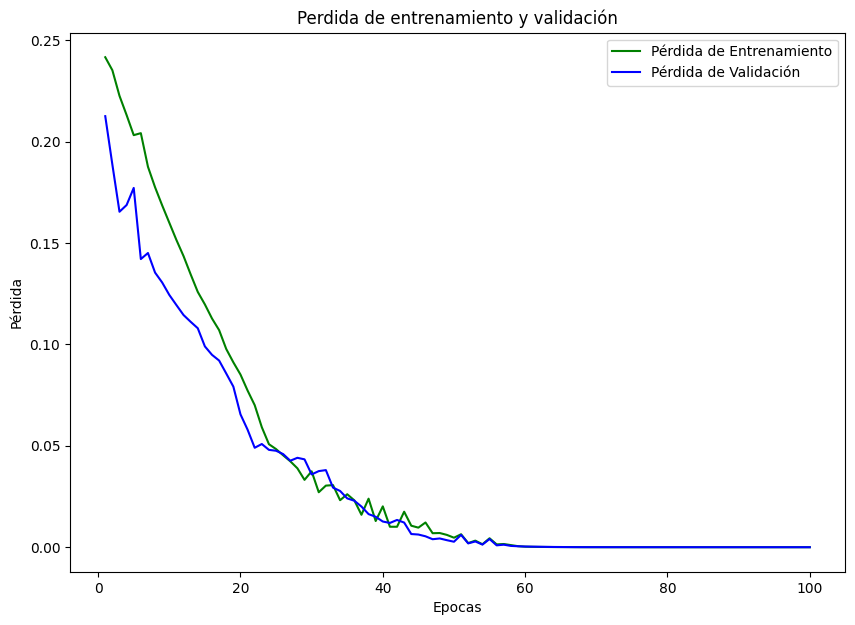

[10.0, 7.0]


In [ ]:
# aumentar el tamaño de los gráficos. El tamaño predeterminado es (6,4).
plt.rcParams["figure.figsize"] = (10,7)

# graficar la pérdida, el modelo anterior está configurado para usar "error cuadrático medio" como la función de pérdida
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Perdida de entrenamiento y validación')
plt.xlabel('Epocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

In [ ]:
# usar el modelo para predecir las entradas de prueba
predictions = model.predict(inputs_test)

# imprime las predicciones y los resultados esperados
print("predicciones =\n", np.round(predictions, decimals=3))
print("reales =\n", outputs_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
predicciones =
 [[0.    0.    1.   ]
 [0.    0.998 0.002]
 [0.999 0.    0.001]
 [0.    0.995 0.005]
 [0.    0.003 0.997]
 [0.001 0.002 0.998]
 [0.998 0.    0.002]
 [0.999 0.    0.001]
 [0.999 0.    0.001]]
reales =
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

[[4 0 0]
 [0 2 0]
 [0 0 3]]


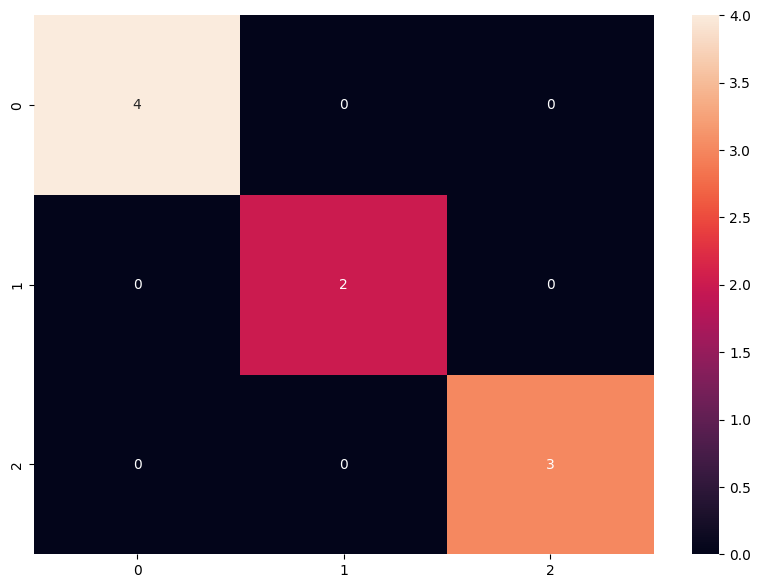

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_test_class = np.argmax(outputs_test,axis=1)
y_pred_class = np.argmax(predictions,axis=1)

#Exactitud de los valores predichos
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)

# visualizar la matriz de confusión en un mapa de calor
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

In [ ]:
from everywhereml.code_generators.tensorflow import tf_porter
#model.fit(inputs_train, outputs_train
porter = tf_porter(model, inputs_train, outputs_train)
cpp_code = porter.to_cpp(instance_name='MovimientoNN', arena_size=4096)

print(cpp_code)

Saved artifact at '/tmp/tmpc7fafd08'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1350), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  135300547013200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135300547016464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135300547016656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135300547017424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135300547016848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135300547018384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135300547018192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135300547018000: TensorSpec(shape=(), dtype=tf.resource, name=None)
#ifndef UUID135300397448656
#define UUID135300397448656

#include <EloquentTinyML.h>
#include <eloquent_tinyml/tensorflow.h>

#ifdef __has_attribute
#define HAVE_A

In [ ]:
# Convierta el modelo al formato TensorFlow Lite sin cuantificación
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


# Guardar el modelo en el disco
open("gesture_model.tflite", "wb").write(tflite_model)

import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)

Saved artifact at '/tmp/tmp2x0_sv92'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1350), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  135300547013200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135300547016464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135300547016656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135300547017424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135300547016848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135300547018384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135300547018192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135300547018000: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model is 279532 bytes


In [ ]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nAbre el panel lateral (refrecar si es necesario). Doble click en model.h para descargar el archivo.")

Header file, model.h, is 1,723,816 bytes.

Abre el panel lateral (refrecar si es necesario). Doble click en model.h para descargar el archivo.
